In [30]:
# Imports
%pylab inline
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('../../src/')
from plothelpers import *
from LateralInhibitionNamingGame import *
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/Users/Bas/anaconda/envs/thesis2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'entropy', 'sample', 'choice', 'flatten', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Preprocess

In [31]:
strategies = {
    'minimal':   dict(d_init=1, d_inc=0, d_inh=1, d_dec=0),
    'frequency': dict(d_init=1, d_inc=1, d_inh=0, d_dec=0),
    'li1':       dict(d_init=1, d_inc=1, d_inh=1, d_dec=0),
    'li2':       dict(d_init=.5, d_inc=.1, d_inh=.5, d_dec=.1),
    'li3':       dict(d_init=.5, d_inc=.1, d_inh=.2, d_dec=.2), #s_max = 1
}

In [36]:
# Preprocess data
values, cols = [], []
for strategy in strategies:
    res = load_LING_simulation('../../results/LING01/', f'LING01-{strategy}')
    for quantity in ['num_unique_words', 'num_words', 'successes']:
        values.append(res[quantity].mean(axis=0))
        values.append(res[quantity].std(axis=0))
        cols.append([strategy, quantity, 'mean'])
        cols.append([strategy, quantity, 'std'])

# Pd dataframe
df = pd.DataFrame(array(values).T)
df.columns = pd.MultiIndex.from_tuples(cols)
df.index = arange(0, res['params']['T'], res['params']['res'])
df.to_csv('LING01-plotdata.csv')

# Plot

In [45]:
# Read all data
df = pd.read_csv('LING01-plotdata.csv', header=[0,1,2], index_col=0)
params = json.load(open('LING01-params.json', 'r'))

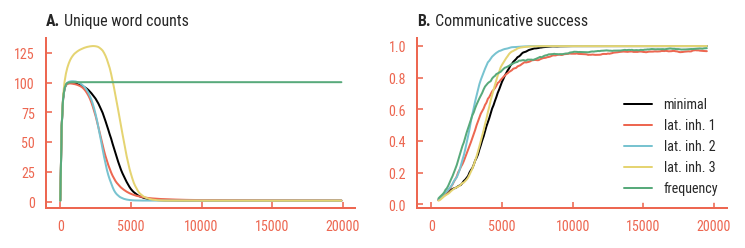

In [50]:
# plot
figure(figsize=cm2inch(12,3))
data = df.iloc[:200,:]
xs = data.index

names = dict(
    minimal   = 'minimal',
    li1       = 'lat. inh. 1',
    li2       ='lat. inh. 2',
    li3 = 'lat. inh. 3',
    frequency = 'frequency')

dashes=dict(
    minimal=(1,1),
    simple_li=(),
    frequency=(4,2),
    li=(4,2,1,2)
)

ax1 = subplot(121)
for strategy in names.keys():
    mean = data[strategy]['num_unique_words']['mean']
    plot(xs, mean, label=names[strategy])   
title('Unique word counts')

ax2 = subplot(122, sharex=ax1)
for strategy in names.keys():
    mean = data[strategy]['successes']['mean'].rolling(window=10, center=True).mean()
    plot(xs, mean, label=names[strategy])
    
legend(bbox_to_anchor=(1,.7))
title('Communicative success')

restyle_title(ax1, ax2)
sns.despine()
subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('LING01-results.pdf', bbox_inches='tight')
copyfig('LING01-results.pdf')